In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Object recognition in Python

* Kernel operations
* Edge detection
* Facial recognition
* Object detection vs. recognition

## What is an object?

![](images/objects.jpg)

## Kernel operations (convolution)

* Imagine images in a 2-dimensional array
* Many small *moving windows* that sums many pixels into one 
* By applying the window many times we reduce the number of values

![](convolution.png)

## Example

Imagine a 4x4 image and a 2x2 kernel

We include a bias of 1

![](images/c1.png)

![](images/c2.png)

![](images/c3.png)

![](images/c4.png)

## Kernel example
https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/

![](images/ball.png)

In [3]:
import cv2
ball = cv2.imread('images/ball.png')

In [4]:
ball

array([[[107, 120, 128],
        [107, 124, 133],
        [104, 120, 132],
        ...,
        [104, 104, 122],
        [ 94, 113, 126],
        [ 96, 114, 125]],

       [[107, 120, 128],
        [108, 125, 134],
        [106, 122, 134],
        ...,
        [ 97,  97, 115],
        [ 91, 107, 120],
        [ 92, 108, 120]],

       [[106, 119, 127],
        [107, 124, 133],
        [104, 120, 132],
        ...,
        [100, 100, 116],
        [ 91, 104, 118],
        [ 94, 106, 118]],

       ...,

       [[253, 252, 254],
        [255, 254, 255],
        [254, 252, 252],
        ...,
        [255, 255, 255],
        [253, 254, 252],
        [255, 255, 255]],

       [[253, 252, 254],
        [255, 254, 255],
        [254, 252, 252],
        ...,
        [255, 255, 255],
        [253, 254, 252],
        [255, 255, 255]],

       [[253, 252, 254],
        [255, 254, 255],
        [254, 252, 252],
        ...,
        [255, 255, 255],
        [253, 254, 252],
        [255, 255, 255]]

In [14]:
kernel = np.array([[-1, 1],
                   [-1, 1]])
size = kernel.shape[0]
margin = size - 1
ball_grey = cv2.cvtColor(ball, cv2.COLOR_BGR2GRAY)

#ball_grey[0:2,0:2] * kernel
pixels = []
for row_index, row in enumerate(ball_grey[:-margin]):
    for column_index, pixel in enumerate(row[:-margin]):
        image_part = ball_grey[row_index:row_index + size, column_index:column_index + size]
        pixels.append((kernel * image_part).sum())

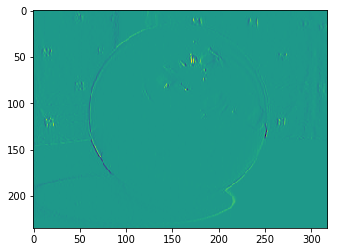

In [15]:
ball_grey.shape
ball_out = np.array(pixels).reshape(235, 318)
plt.imshow(ball_out)

## Cascading convolutions

https://docs.opencv.org/4.0.1/dc/d88/tutorial_traincascade.html

## Pretrained cascades

https://github.com/opencv/opencv/tree/master/data/haarcascades

## Image detection in opencv

https://docs.opencv.org/4.0.1/d7/d8b/tutorial_py_face_detection.html

![](images/avengers.jpg)

In [8]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

img = cv2.imread('images/avengers.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
faces = face_cascade.detectMultiScale(gray)

In [10]:
faces

array([[ 594,   98,   39,   39],
       [ 928,  133,   53,   53],
       [ 505,  186,   57,   57],
       [ 577,  220,   98,   98],
       [ 455,  299,   70,   70],
       [ 718,  313,   77,   77],
       [ 816,  364,   69,   69],
       [ 456,  416,   55,   55],
       [ 841,  454,   51,   51],
       [ 592,  415,   71,   71],
       [ 406,  472,   46,   46],
       [1118,  475,   44,   44],
       [ 930,  508,   28,   28],
       [ 208,  528,   31,   31],
       [ 319,  484,   41,   41]], dtype=int32)

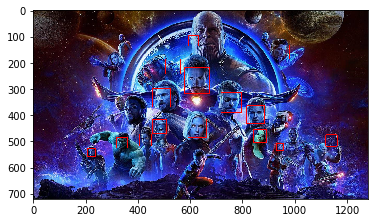

In [11]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
plt.imshow(img)

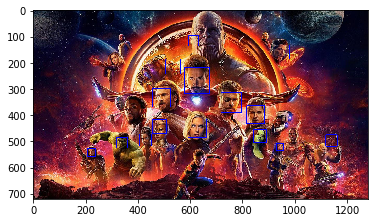

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

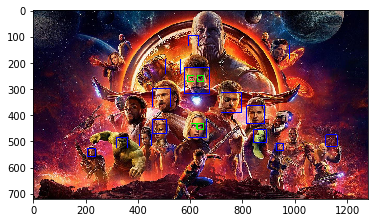

In [13]:
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Object recognition

https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/

## Exercise

* Find the face rectangles and eye rectangles in the following picture, located at `images/lam.png`

![](images/lam.png)